In [ ]:
!python --version

Python 3.7.6


In [ ]:
import os
import cv2
import numpy as np

In [ ]:
cv2.__version__

'4.4.0'

In [ ]:
vid_path = os.path.join(os.path.dirname('__file__'),  'people.mp4')

try:
    if vid_path:
        cap = cv2.VideoCapture(vid_path)
    else:
        cap = cv2.VideoCapture(0)
except Exception as e:
    print(e)
    cap = None

In [ ]:
filename = vid_path.split('.')[0]

In [ ]:
cap.isOpened()

True

In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS)
print("Frames per second is: {0}".format(fps))

Frames per second is: 23.97


In [ ]:
labelsPath = os.path.join(os.path.dirname('__file__'),  'coco.names')
weightsPath = os.path.join(os.path.dirname('__file__'),  'yolov4.weights')
configPath = os.path.join(os.path.dirname('__file__'),  'yolov4.cfg')

In [ ]:
LABELS = open(labelsPath).read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [ ]:
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
FR = 0
(W, H) = (None, None)

In [ ]:
try:
    while True:
        (grabbed, frame) = cap.read()

        if not grabbed:
            break

        if W is None or H is None:
            (H, W) = frame.shape[:2]
            FW = W
            if (W < 1075):
                FW = 1075
            FR = np.zeros((H + 210, FW, 3), np.uint8)

            col = (255, 255, 255)
            FH = H + 210
        FR[:] = col

        blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        layerOutputs = net.forward(ln)

        boxes = []
        confidences = []
        classIDs = []

        for output in layerOutputs:

            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]
                if LABELS[classID]:

                    if confidence > 0.5:
                        box = detection[0:4] * np.array([W, H, W, H])
                        (centerX, centerY, width, height) = box.astype("int")

                        x = int(centerX - (width / 2))
                        y = int(centerY - (height / 2))

                        boxes.append([x, y, int(width), int(height)])
                        confidences.append(float(confidence))
                        classIDs.append(classID)

        idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)

        if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                color = [int(c) for c in COLORS[classIDs[i]]]
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 1, lineType=cv2.LINE_AA)
                text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
                cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 1, lineType=cv2.LINE_AA)

        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        opname = "output_" + filename  + ".mp4"
        fourcc = cv2.VideoWriter_fourcc(*"MJPG")
        writer = cv2.VideoWriter(opname, fourcc, 30, (frame.shape[1], frame.shape[0]), True)

    cap.release()
    cv2.destroyAllWindows()
except Exception as e:
    print(e)

In [178]:
output_path = os.path.join(os.path.dirname('__file__'),  'output_people.mp4')

In [184]:
vol = os.path.getsize(vid_path)
print('Input File Volume: ' + str(round(inputVolume / (1024 * 1024), 3)) + 'MB')

Input File Volume: 5.005MB


# YOLO v4 on CPU

In [176]:
import os
import cv2
import numpy as np
from imutils.video import FPS

print(cv2.__version__)
vid_path = os.path.join(os.path.dirname('__file__'),  'people.mp4')

try:
    if vid_path:
        cap = cv2.VideoCapture(vid_path)
    else:
        cap = cv2.VideoCapture(0)
except Exception as e:
    print(e)
    cap = None

fps = cap.get(cv2.CAP_PROP_FPS)
print("Frames per second is: {0}".format(fps))

fps = FPS().start()

labelsPath = os.path.join(os.path.dirname('__file__'),  'coco.names')
weightsPath = os.path.join(os.path.dirname('__file__'),  'yolov4.weights')
configPath = os.path.join(os.path.dirname('__file__'),  'yolov4.cfg')

LABELS = open(labelsPath).read().strip().split("\n")
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")


net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
FR = 0
(W, H) = (None, None)

f = None

try:
    while True:
        (grabbed, frame) = cap.read()

        if not grabbed:
            break

        if W is None or H is None:
            (H, W) = frame.shape[:2]
            FW = W
            if (W < 1075):
                FW = 1075
            FR = np.zeros((H + 210, FW, 3), np.uint8)

            col = (255, 255, 255)
            FH = H + 210
        FR[:] = col

        blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (416, 416), swapRB=True, crop=False)
        net.setInput(blob)
        flops = net.getFLOPS(layerId=1, netInputShape=blob.shape)
        print("FLOPS:::::::::" + str(flops))
        layerOutputs = net.forward(ln)

        boxes = []
        confidences = []
        classIDs = []

        for output in layerOutputs:
            for detection in output:
                scores = detection[5:]
                classID = np.argmax(scores)
                confidence = scores[classID]
                if LABELS[classID]:
                    if confidence > 0.5:
                        box = detection[0:4] * np.array([W, H, W, H])
                        (centerX, centerY, width, height) = box.astype("int")

                        x = int(centerX - (width / 2))
                        y = int(centerY - (height / 2))

                        boxes.append([x, y, int(width), int(height)])
                        confidences.append(float(confidence))
                        classIDs.append(classID)

        idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)

        if len(idxs) > 0:
            for i in idxs.flatten():
                (x, y) = (boxes[i][0], boxes[i][1])
                (w, h) = (boxes[i][2], boxes[i][3])
                color = [int(c) for c in COLORS[classIDs[i]]]
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 1, lineType=cv2.LINE_AA)
                text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
                det = text, x, y, w, h
                with open("detections.txt", "a") as f:
                    f.write(str(det) + '\n')
                cv2.putText(frame, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 1, lineType=cv2.LINE_AA)
            cv2.imshow('frame', frame)
            f.close()
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        fps.update()

    cap.release()
    cv2.destroyAllWindows()
    fps.stop()
    print("Elasped time: {:.2f}".format(fps.elapsed()))
    print("Approx. FPS: {:.2f}".format(fps.fps()))
except Exception as e:
    print(e)


4.4.0
Frames per second is: 23.97
FLOPS:::::::::304578560
FLOPS:::::::::304578560
FLOPS:::::::::304578560
FLOPS:::::::::304578560
Elasped time: 6.16
Approx. FPS: 0.49


In [ ]:
from IPython.display import Video

In [ ]:
Video("output_people.mp4")

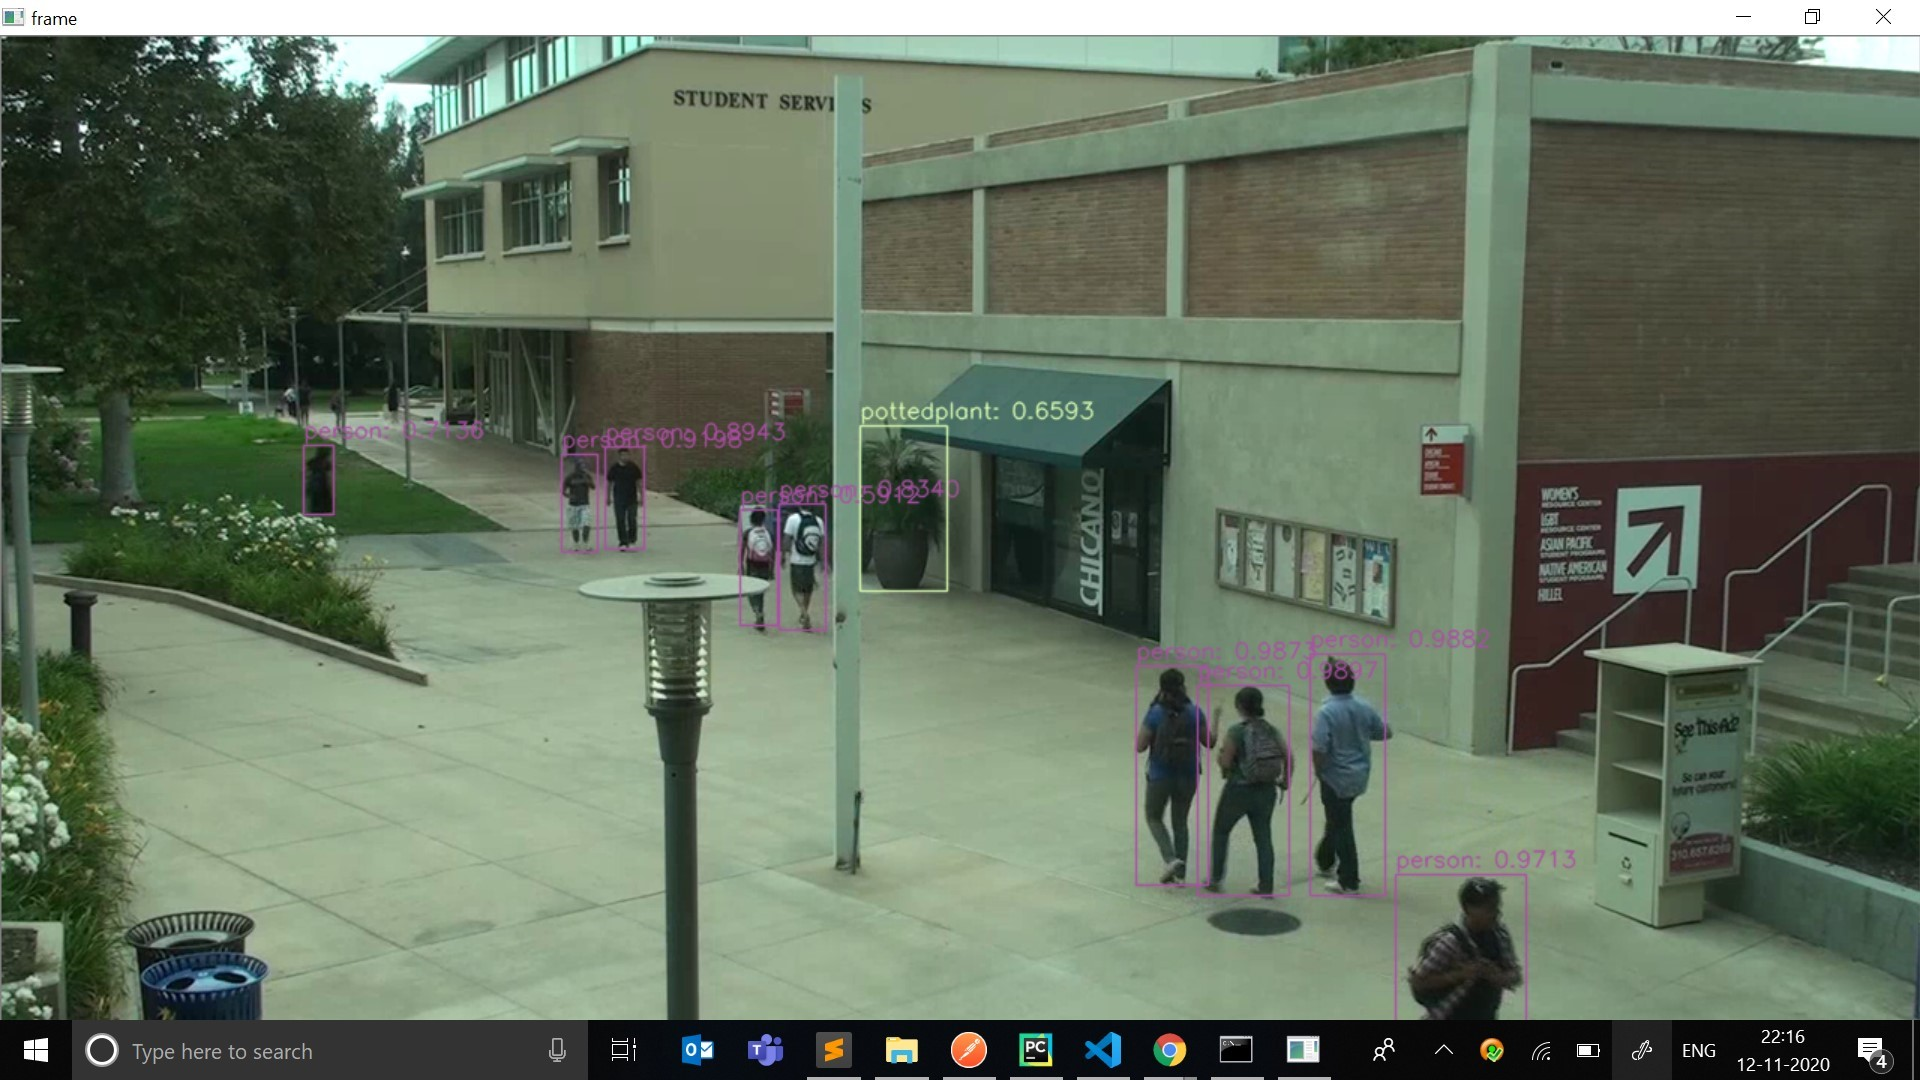

In [67]:
import pandas as pd

In [168]:
data = pd.read_csv('groundtruth.csv')
preds = pd.read_csv('predicted.csv')
data['x_pred'] = preds.x_pred
data['y_pred'] = preds.y_pred
data['w_pred'] = preds.w_pred
data['h_pred'] = preds.h_pred

In [169]:
print(data)

          name    x    y    w    h  x_pred  y_pred  w_pred  h_pred
0       person  809  401   80  143     825     457      85     161
1       person  745  475   71  172     738     509      60     170
2       person  123  233  183  367     341     209     466     295
3       person  276  202  454  310     341     209     466     295
4       person  309  101  429  350     325     157     409     361
5       person  812  448   84  162     798     478      39     167
6       person  751  490   80  186     365     278      23      55
7     backpack  738  505   39   53     738     509      39      57
8  pottedplant   71  252  163  348      26     275     160     371


In [170]:
def IOU(df):
  try:
    x_inter = max(df.x, df.x_pred)
    y_inter = max(df.y, df.y_pred)
    w_inter = min(df.w, df.w_pred)
    h_inter = min(df.h, df.h_pred)
 
    inter_area = max(0, x_inter - y_inter + 1) * max(0, w_inter - h_inter + 1)
 
    actual_area = (df.x - df.y + 1) * (df.w - df.h + 1)
    pred_area = (df.x_pred - df.y_pred + 1) * (df.w_pred - df.h_pred+ 1)
 
    iou = inter_area / float(actual_area + pred_area - inter_area)
    return iou
  except Exception as e:
    print(e)
    return None

In [171]:
eval_table = pd.DataFrame()
eval_table['image_name'] = data.name
eval_table['IOU'] = data.apply(IOU, axis = 1)
eval_table['TP/FP'] = eval_table['IOU'].apply(lambda x: 'TP' if x>=0.5 else 'FP')
precision = []
recall = []
TP = 0
FP = 0
FN = len(eval_table['TP/FP']== 'TP')

for index, row in eval_table.iterrows():     
    if row.IOU > 0.5:
        TP =TP+1
    else:
        FP =FP+1   
    try:    
        AP = TP/(TP+FP)
        Rec = TP/(TP+FN)
    except ZeroDivisionError:
        AP = Recall = 0.0
    
    precision.append(AP)
    recall.append(Rec)

eval_table['Precision'] = precision
eval_table['Recall'] = recall
eval_table['IP'] = eval_table.groupby('Recall')['Precision'].transform('max')
print(eval_table.head())

  image_name       IOU TP/FP  Precision    Recall    IP
0     person -0.000000    FP       0.00  0.000000  0.00
1     person -0.000000    FP       0.00  0.000000  0.00
2     person  0.000000    FP       0.00  0.000000  0.00
3     person  1.706359    TP       0.25  0.100000  0.25
4     person  0.682323    TP       0.40  0.181818  0.40


In [172]:
prec_at_rec = []
for recall_level in np.linspace(0.0, 1.0, 11):
    try:
        x = eval_table[eval_table['Recall'] >= recall_level]['Precision']
        prec = max(x)
    except:
        prec = 0.0
    prec_at_rec.append(prec)
avg_prec = np.mean(prec_at_rec)
print('11 point precision is ', prec_at_rec)
print('mAP is ', avg_prec)

11 point precision is  [0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mAP is  0.07272727272727274


In [189]:
yolov4_res = {
    "mAP": avg_prec,
    "fps": fps.elapsed(),
    "flops": flops,
    "volume": vol,
}
print(yolov4_res)

{'mAP': 0.07272727272727274, 'fps': 6.159015, 'flops': 304578560, 'volume': 5248590}
